In [2]:
import os
from PIL import ImageFile 
from tensorflow.keras import optimizers
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil
from tqdm.notebook import tqdm as tq
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load Dataset 

In [3]:
mypath = 'faceshape/'

In [4]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [5]:
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
testing_set\Heart        100
testing_set\Oblong       100
testing_set\Oval         100
testing_set\Round        100
testing_set\Square       100
training_set\Heart       800
training_set\Oblong      800
training_set\Oval        800
training_set\Round       800
training_set\Square      800
validation_set\Heart     100
validation_set\Oblong    100
validation_set\Oval      100
validation_set\Round     100
validation_set\Square    100
dtype: int64

In [6]:
#check sample data
df.head()

,path,file_name,tag
0,faceshape/testing_set\Heart\heart (485).jpg,heart (485).jpg,testing_set\Heart
1,faceshape/testing_set\Heart\heart (487).jpg,heart (487).jpg,testing_set\Heart
2,faceshape/testing_set\Heart\heart (488).jpg,heart (488).jpg,testing_set\Heart
3,faceshape/testing_set\Heart\heart (491).jpg,heart (491).jpg,testing_set\Heart
4,faceshape/testing_set\Heart\heart (493).jpg,heart (493).jpg,testing_set\Heart


In [7]:
# from PIL import Image

# # Specify the root folder containing the image sets
# root_folder = 'faceshape/'

# # Specify the image sets and their corresponding paths
# image_sets = {
#     'testing_set': os.path.join(root_folder, 'testing_set'),
#     'training_set': os.path.join(root_folder, 'training_set'),
#     'validation_set': os.path.join(root_folder, 'validation_set')
# }

# # Iterate through the image sets
# for set_name, set_path in image_sets.items():
#     print(f"Images in {set_name}:")
#     # Iterate through the tags in the set
#     for tag in os.listdir(set_path):
#         tag_path = os.path.join(set_path, tag)
#         # Iterate through the image files in the tag folder
#         for filename in os.listdir(tag_path):
#             # Check if the file is an image file (optional)
#             if filename.endswith('.jpg') or filename.endswith('.png'):
#                 # Open the image file
#                 image_path = os.path.join(tag_path, filename)
#                 image = Image.open(image_path)

#                 # Show the image
#                 image.show()

#                 # Print the tag and image file name
#                 print(f"Tag: {tag}, Image: {filename}")

# Train Test Split

In [8]:
#variabel untuk split
x= df['path']
y= df['tag']

In [9]:
# split dataset awal menjadi data train dan test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=300)

In [10]:
# kemudian data test dibagi menjadi 2 sehingga menjadi data test dan data validation.
x_test, x_val, y_test, y_val = train_test_split(
    x_test, y_test, test_size=0.5, random_state=100)

In [11]:
# menyatukan kedalam masing-masing dataframe

df_tr = pd.DataFrame({'path':x_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':x_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':x_val
              ,'tag':y_val
             ,'set':'validation'})

In [12]:
print('train size', len(df_tr))
print('val size', len(df_te))
print('test size', len(df_val))

train size 4000
val size 500
test size 500


In [13]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = pd.concat([df_tr, df_te, df_val], ignore_index=True)\


print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)


set         tag                  
test        testing_set\Heart          8
            testing_set\Oblong         8
            testing_set\Oval          13
            testing_set\Round         14
            testing_set\Square        11
            training_set\Heart        79
            training_set\Oblong       76
            training_set\Oval         82
            training_set\Round        76
            training_set\Square       77
            validation_set\Heart      10
            validation_set\Oblong      9
            validation_set\Oval       12
            validation_set\Round      12
            validation_set\Square     13
train       testing_set\Heart         86
            testing_set\Oblong        83
            testing_set\Oval          80
            testing_set\Round         81
            testing_set\Square        75
            training_set\Heart       637
            training_set\Oblong      631
            training_set\Oval        639
            training_s

,path,tag,set
4158,faceshape/testing_set\Oval\oval (528).jpg,testing_set\Oval,test
3433,faceshape/training_set\Round\round (790).jpg,training_set\Round,train
1875,faceshape/validation_set\Square\square (241).jpg,validation_set\Square,train


# Merapihkan ke folder set masing-masing

In [14]:
datasource_path = "faceshape/"
dataset_path = "dataset/"

In [15]:
for index, row in tq(df_all.iterrows()):
    # Detect file path
    file_path = row['path']
    if not os.path.exists(file_path):
        file_path = os.path.join(datasource_path, row['tag'], row['file_name'].split('.')[0])

    # Make folder destination dirs
    destination_dir = os.path.join(dataset_path, row['set'], row['tag'])
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    # Define file destination
    destination_file_name = os.path.basename(file_path)
    file_dest = os.path.join(destination_dir, destination_file_name)

    # Copy file from source to destination
    if not os.path.exists(file_dest):
        shutil.copy2(file_path, file_dest)

0it [00:00, ?it/s]

# Mempersiapkan variabel global untuk training

In [16]:
# Parameter input untuk network
dim = (224, 224)
channel = (3, )
input_shape = dim + channel
# Batch size
batch_size =10
# Epoch

# Definisikan terlebih dahulu bagaimana transformasi data yang akan digunakan

In [17]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

# Membuat flow data

In [18]:
# binary = [1,0,0,0,0] [0,1,0,0,0] [0,0,1,0,0] [0,0,0,1,0] [0,0,0,0,1] 
# categorical = 1,2,3,4,5

train_generator = train_datagen.flow_from_directory('faceshape/training_set/',
                                                    target_size=input_shape[:2],
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('faceshape/validation_set/',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory('faceshape/testing_set/',
                                                  target_size=input_shape[:2],
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

num_class = train_generator.num_classes

Found 4000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


# Transformasi data generator menjadi tf.data

In [19]:
def tf_data_generator():
    tf_generator = tf.data.Dataset.from_generator(
        lambda: train_generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None, *input_shape],
                       [None, num_class])
    )
    return tf_generator

train_data = tf_data_generator()
val_data = tf_data_generator()
test_data = tf_data_generator()

In [20]:
from tensorflow.keras.applications import MobileNetV2
# get base models
base_model = MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

In [21]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model
#Adding custom layers
x = base_model.output
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
predictions = layers.Dense(num_class, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [23]:
# Compile the model
print('Compiling Model')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model


# Visualisasi Model

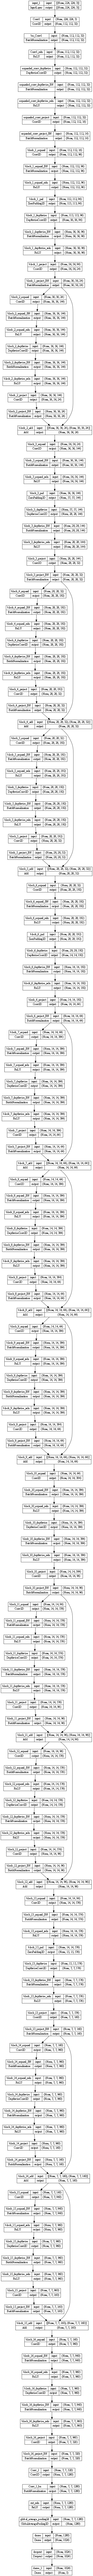

In [24]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [25]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
EPOCH = 5
history = model.fit(train_data,
                    epochs=EPOCH,
                    #steps_per_epoch = 5,
                    validation_data=val_data,
                    verbose=1)

Epoch 1/5
   4937/Unknown - 4233s 855ms/step - loss: 1.0233 - accuracy: 0.5876

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# # Set the path to your dataset
# train_dir = 'faceshape/training_set'
# validation_dir = 'faceshape/validation_set'

# # Set the image dimensions and batch size
# image_width = 224
# image_height = 224
# batch_size = 32

# # Create data generators with data augmentation for training and validation
# train_datagen = ImageDataGenerator(
#     rescale=1.0/255.0,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(image_width, image_height),
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# validation_generator = validation_datagen.flow_from_directory(
#     validation_dir,
#     target_size=(image_width, image_height),
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# # Create the model
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(5, activation='softmax'))  # Update the number of neurons to match the number of classes

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# epochs = 10
# history = model.fit(
#     train_generator,
#     steps_per_epoch=len(train_generator),
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=len(validation_generator)
# )

# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(validation_generator, steps=len(validation_generator))
# print('Test Loss:', test_loss)
